In [11]:
#importing libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics


In [65]:
gold_data= pd.read_csv('Gold_Price_dataset.csv')  #reading dataset 

In [13]:
gold_data.head()

Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099

In [15]:
gold_data.tail()

Date          SPX         GLD      USO      SLV   EUR/USD
2285   5/8/2018  2671.919922  124.589996  14.0600  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.3700  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033

In [17]:
gold_data.shape

(2290, 6)

In [19]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [21]:
# getting the statistical measures of the data
gold_data.describe()

SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798

In [35]:
# Drop the date column for correlation calculation
gold_data_numeric = gold_data.drop(columns=['Date'])

# Now, you can calculate correlation
correlation = gold_data_numeric.corr()


<Axes: >

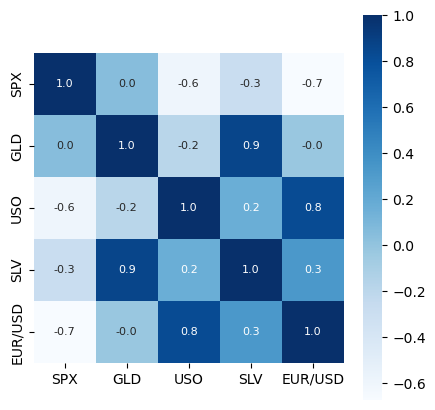

In [39]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [41]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_37176\1771350702.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

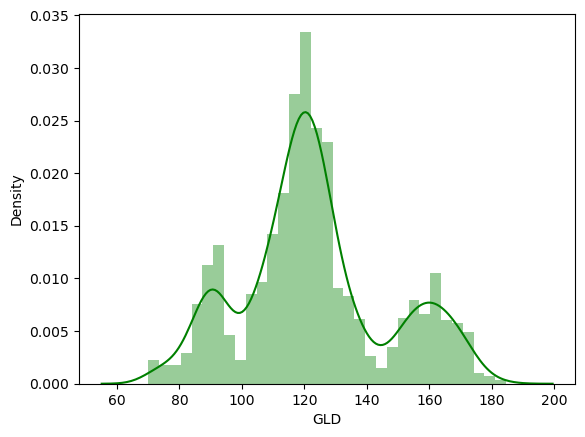

In [43]:
 #checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [45]:
#splitting the features and target

X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [47]:
print(X,Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [53]:
#Model Training: Random Forest Regressor

regressor = RandomForestRegressor(n_estimators=100)
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [55]:
#model evaluation
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [57]:
print(test_data_prediction)

[168.35229938  82.30059963 116.3298996  127.63810065 120.75050123
 154.72839765 149.90199796 125.97070069 117.5387988  126.06420045
 116.71440104 171.64770066 141.91499837 167.47819811 115.24480008
 117.80210056 139.61770263 170.18010062 160.06580286 159.1236997
 155.15240001 125.19840016 175.61540018 157.34990298 125.24060034
  93.7740996   77.60990056 120.95580033 119.04819899 167.46409956
  88.0575007  125.1675      91.23980091 117.66470013 121.11339944
 136.16800066 115.64630144 114.86220066 148.44189998 107.38390125
 104.59650257  87.16709785 126.43840046 118.14129991 153.93279863
 119.57670002 108.36709996 107.98159854  93.26280037 127.05589788
  75.16130015 113.72549913 121.23999962 111.33929897 118.90279885
 120.72769913 158.73240011 168.01250169 147.0066969   85.92529848
  94.53820001  86.70059844  90.59280025 118.90030091 126.51260085
 127.70850019 169.69539976 122.3030992  117.37829901  98.56300013
 168.40950123 143.05479911 131.8973026  121.05420226 121.349999
 119.7358006 

In [59]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9892608451692949


In [61]:
#compare the Actual Values and Predicted Values in a Plot

Y_test = list(Y_test)

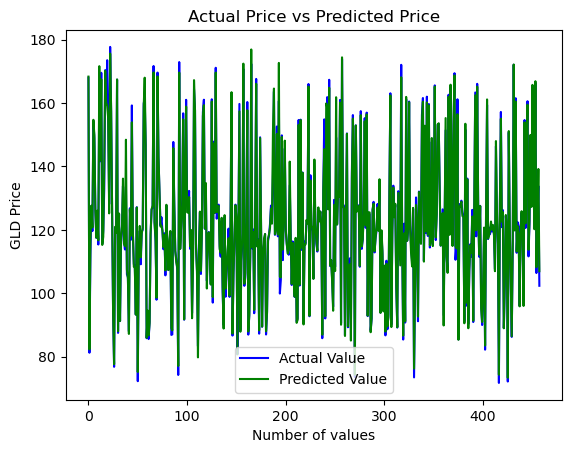

In [63]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()